# Supervised Learning: Classification


This notebook contains the code needed to generate plots for the supervised learning lecture, part 2 on classification.

In [153]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Create some toy model data from a cubic function - note we will only have one dimension (no intercept)

In [154]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_step(x, threshold=0.5):
    return np.where( x > threshold , 1 , 0)

def toy_model(x):
    x = x  + 0.8*(np.random.rand(1 if isinstance(x, (int, float)) else len(x)) - 0.5)
    x = sigmoid(x)
    return binary_step(x)

Generate some data

In [155]:
N = 10
x = np.linspace(-1., 1., N) + 0.4*np.random.rand(N)

y = toy_model(x)

In [156]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

([<matplotlib.axis.YTick at 0x1619c1ad0>,
 [Text(0, 0, 'No  0'), Text(0, 1, 'Yes  1')])

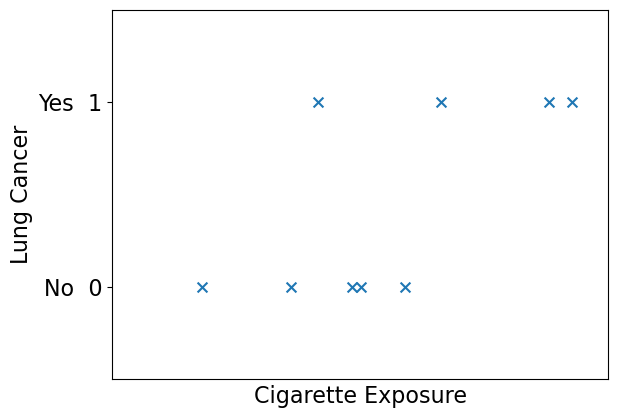

In [157]:
plt.scatter(x, y, marker="x", s=50)
plt.xlabel("Cigarette Exposure", fontsize=16)
plt.ylabel("Lung Cancer", fontsize=16)
plt.axis(xmin=-1.3, xmax=1.2, ymax=1.5, ymin=-.5)
plt.xticks([])
plt.yticks([0, 1], ["No  0", "Yes  1"], fontsize=16)


## Fit logistic / sigmoid function


Text(0, 0.5, '$\\theta$')

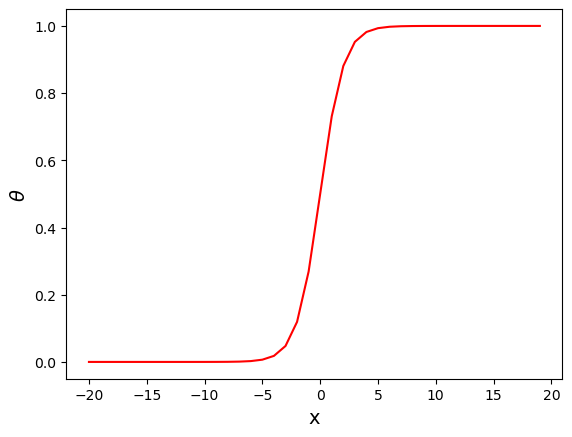

In [170]:
x_domain = np.arange(-20, 20)
plt.plot(x_domain, sigmoid(x_domain), color="red" )
plt.xlabel("x", fontsize=14)
plt.ylabel(r"$\theta$", fontsize=14)

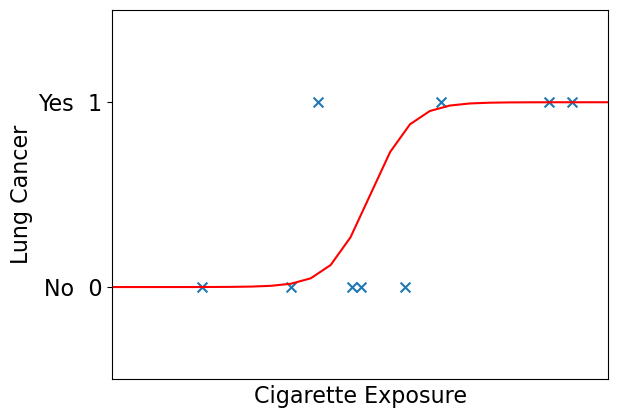

In [166]:
plt.scatter(x, y, marker="x", s=50)
plt.xlabel("Cigarette Exposure", fontsize=16)
plt.ylabel("Lung Cancer", fontsize=16)
plt.axis(xmin=-1.3, xmax=1.2, ymax=1.5, ymin=-.5)
plt.xticks([])
plt.yticks([0, 1], ["No  0", "Yes  1"], fontsize=16)
plt.plot(x_domain/10, sigmoid(x_domain), color="red" )


(-0.05, 1.05, -0.012498724619936742, 0.3)

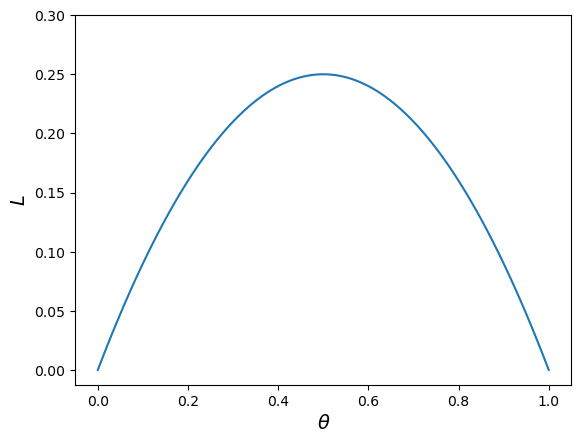

In [184]:
## Maximum likelihood
x_domain = np.linspace(0, 1., 100)
plt.plot(x_domain, x_domain*(1-x_domain))
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$L$", fontsize=14)
plt.axis(ymax = 0.3)

(-0.05, 1.05, -0.012498724619936742, 0.3)

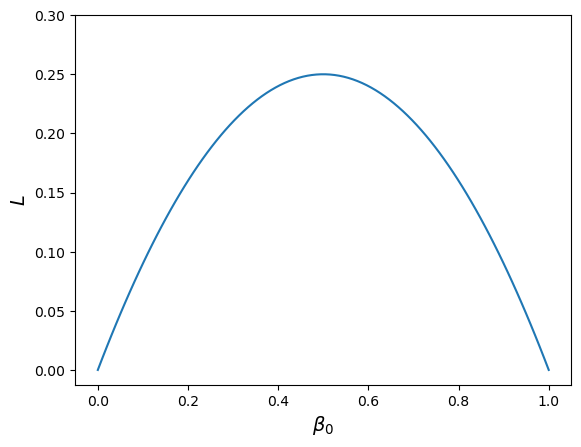

In [185]:
## Maximum likelihood
x_domain = np.linspace(0, 1., 100)
plt.plot(x_domain, x_domain*(1-x_domain))
plt.xlabel(r"$\beta_0$", fontsize=14)
plt.ylabel(r"$L$", fontsize=14)
plt.axis(ymax = 0.3)

Text(0, 0.5, '-$L$')

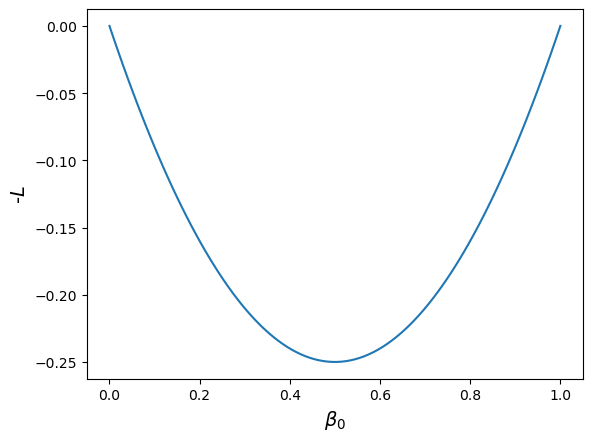

In [192]:
## Maximum likelihood
x_domain = np.linspace(0, 1., 100)
plt.plot(x_domain, -x_domain*(1-x_domain))
plt.xlabel(r"$\beta_0$", fontsize=14)
plt.ylabel(r"-$L$", fontsize=14)
#plt.axis(ymax = 0.3)

In [194]:
import pandas as pd
df = pd.read_csv("/Users/lauraman/Downloads/drug200.xls")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [196]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
